In [161]:
import sys  
!{sys.executable} -m pip install --user matplotlib

In [162]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#### upload csv file with stocks data... this dataset was found on yahoo 

In [156]:
intraday = pd.read_csv("AAPL.csv")

#### Math equation for volatility : High - Low / Close

In [157]:
intraday['Volatility']= (intraday['High']-intraday['Low'])/intraday['Close']

In [158]:
intraday['Volume_delta'] = intraday['Volume'] - intraday['Volume'].shift(1)

In [159]:
intraday['Volume_delta'] = intraday['Volume'] - intraday['Volume'].shift(1)

In [160]:
intraday['Volatility_delta'] = intraday['Volatility'] - intraday['Volatility'].shift(1)

In [164]:
plt.rcParams["figure.figsize"]=[30,10]

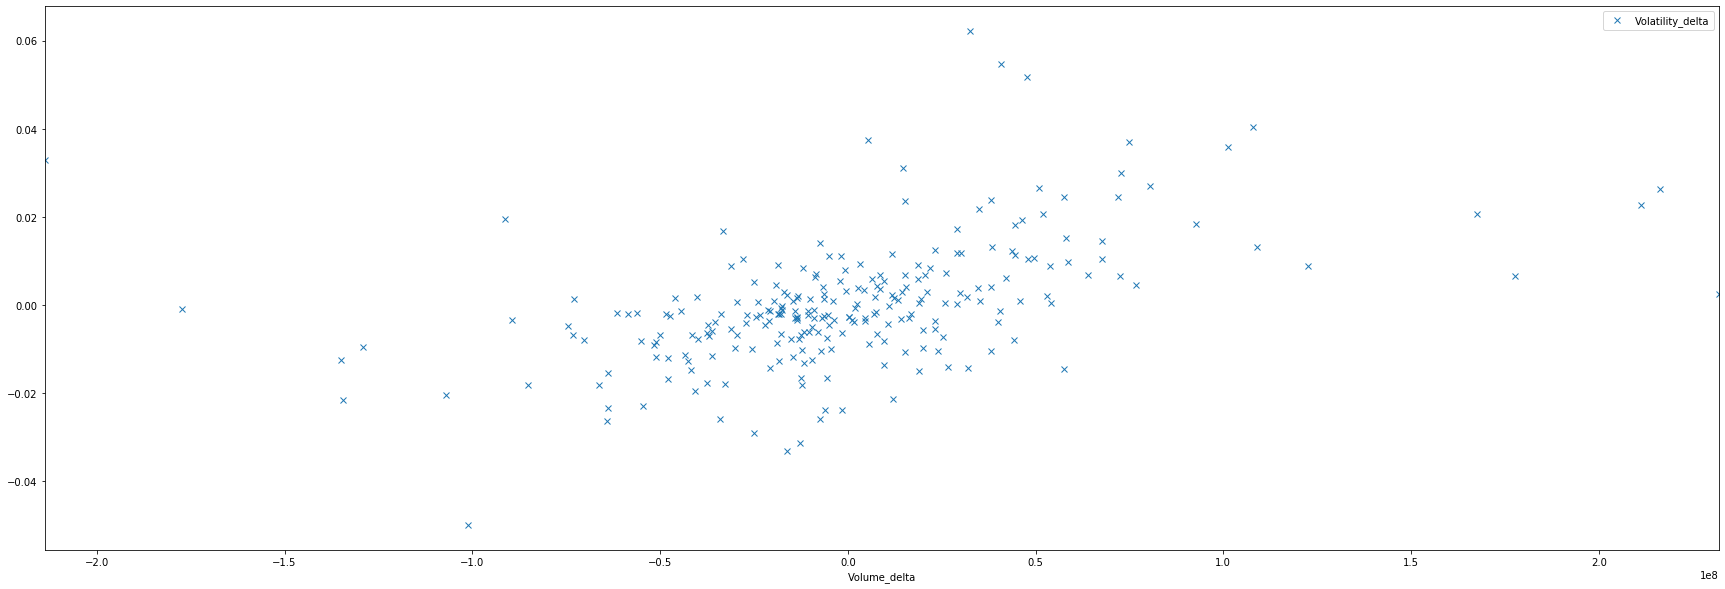

In [165]:
intraday.plot(x='Volume_delta',y='Volatility_delta', style='x')

In [166]:
dataset= pd.read_csv("AAPL.csv")

#### find the shape of the dataset to help with understanding the data

In [167]:
dataset.shape

(253, 7)

In [169]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,79.947016,81.050731,78.878607,80.047658,79.735307,1.373535e+08
std,18.914767,19.131631,18.271225,18.669958,18.820604,5.676754e+07
min,54.607498,55.235001,53.152500,54.419998,53.885353,4.661760e+07
25%,65.937500,66.842499,65.525002,66.394997,65.940086,9.743360e+07
50%,75.805000,76.292503,75.052498,75.934998,75.593697,1.256428e+08
75%,90.019997,91.250000,88.254997,90.014999,89.852997,1.659340e+08
max,137.589996,137.979996,130.529999,134.179993,134.179993,3.743368e+08


#### plot the close rates 

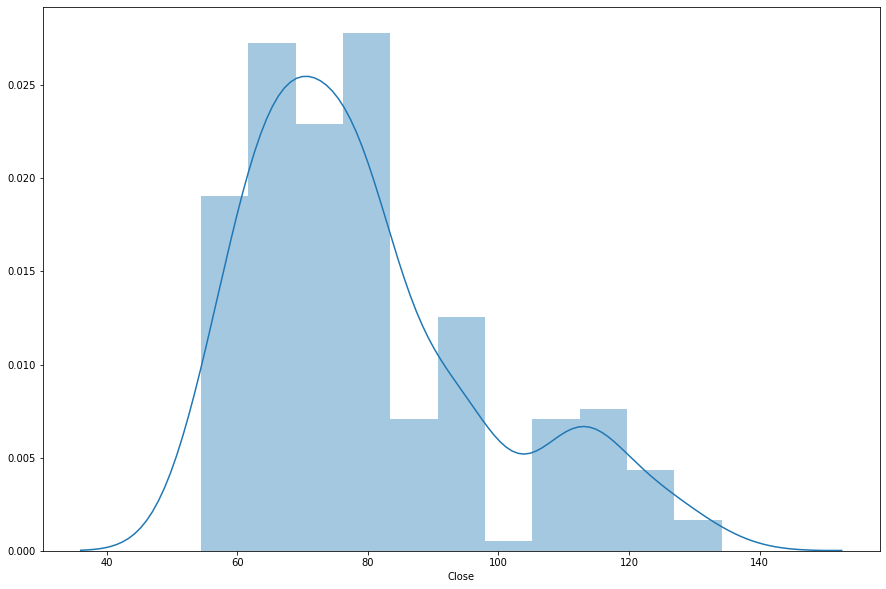

In [170]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['Close'])

#### Split the dataset, assign features and target

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [172]:
X = dataset[['Open','High','Low','Adj Close']]
Y = dataset['Close']

In [173]:
print(X_train.head())
print(y_train.head())

          Open       High        Low  Adj Close
57   67.864998  68.824997  67.732498  68.316193
176  80.837502  82.937500  80.807503  82.725845
117  63.985001  67.500000  62.000000  61.778580
183  87.864998  88.300003  86.180000  87.861580
82   79.644997  79.997498  79.327499  78.880821
57     68.787498
176    82.875000
117    62.057499
183    88.019997
82     79.425003
Name: Close, dtype: float64


#### fit data to a Linear Regression Model

In [174]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
y_pred = regressor.predict(X_test)

In [176]:
y_test.shape

(64,)

In [177]:
y_pred.shape

(64,)

In [178]:
X_test.shape

(64, 4)

In [179]:
y_test.shape

(64,)

In [180]:
col_aapl=['Open','High','Low','Adj Close']

coeff_aapl = pd.DataFrame(regressor.coef_, col_aapl, columns=['Coefficient'])  
coeff_aapl

,Coefficient
Open,0.014314
High,-0.028947
Low,0.008145
Adj Close,0.998980


In [181]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
120,63.215000,63.333211
108,68.339996,68.350920
129,63.702499,63.867102
30,64.282501,64.118997
0,54.419998,54.413125
191,88.407501,88.497129
195,91.027496,91.106405
182,85.747498,85.833624
99,81.237503,81.209944
29,64.375000,64.212036


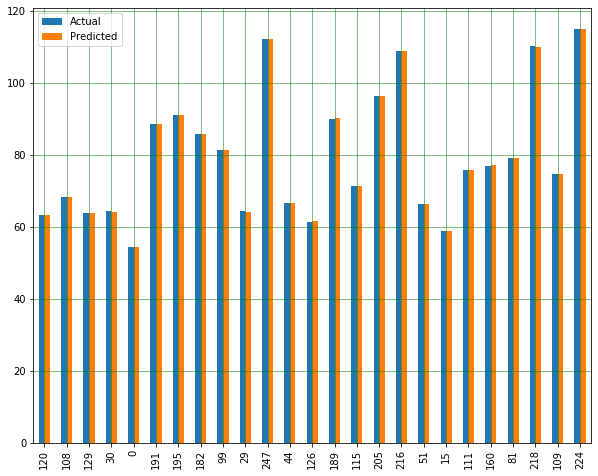

In [182]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

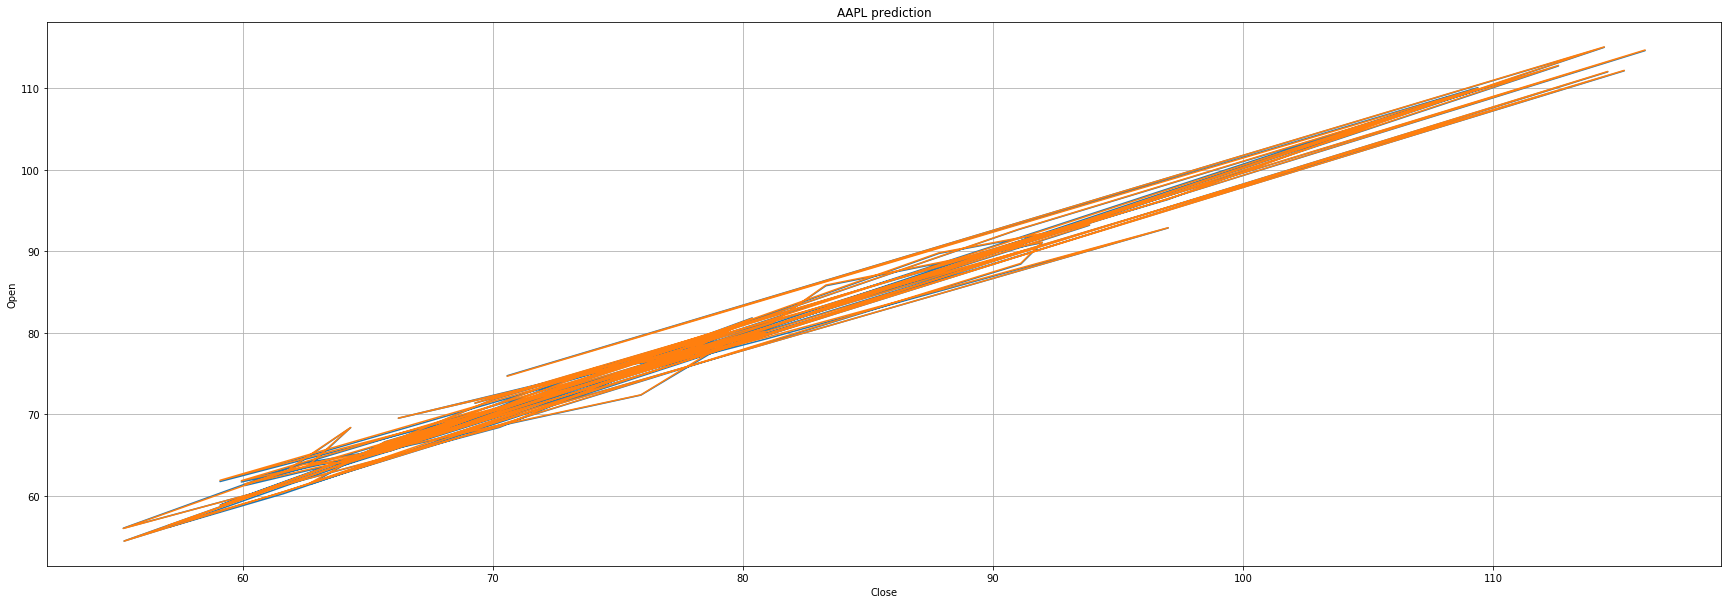

In [183]:
#Plot the predicted and the expected values
ax = plt.axes()
ax.grid()
ax.set(xlabel='Close')
ax.set(ylabel='Open')
ax.set(title='AAPL prediction')
ax.plot(X_test['Open'],y_test) #blue line
ax.plot(X_test['Open'],y_pred) #orange line
plt.show()

In [184]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.08987451416246872
Mean Squared Error: 0.012822193946521489
Root Mean Squared Error: 0.11323512682256107
R-squared Error: 0.9999486234823521


In [8]:
""""The regression model for Apple data is to predict the Close amount at End of Day. From the R Squared Error which 
gives 0.9999 error, the model can be deemed really good. From the graph for Volatility_Delta vs Volume_Delta, it is shown 
that for the stock, there is a linear increase so as the volume increases, the volatility also increases."""

'"The regression model for Apple data is to predict the Close amount at End of Day. From the R Squared Error which \ngives 0.9999 error, the model can be deemed really good. From the graph for Volatility_Delta vs Volume_Delta, it is shown \nthat for the stock, there is a linear increase so as the volume increases, the volatility also increases.'